Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1135)>



100%|██████████| 9912422/9912422 [00:15<00:00, 632031.83it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1135)>



100%|██████████| 28881/28881 [00:00<00:00, 154651.05it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1135)>



100%|██████████| 1648877/1648877 [00:02<00:00, 655459.37it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1135)>



100%|██████████| 4542/4542 [00:00<00:00, 192848.40it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.0412
Epoch [2/10], Loss: 0.0255
Epoch [3/10], Loss: 0.0214
Epoch [4/10], Loss: 0.0195
Epoch [5/10], Loss: 0.0211
Epoch [6/10], Loss: 0.0171
Epoch [7/10], Loss: 0.0164
Epoch [8/10], Loss: 0.0170
Epoch [9/10], Loss: 0.0151
Epoch [10/10], Loss: 0.0154


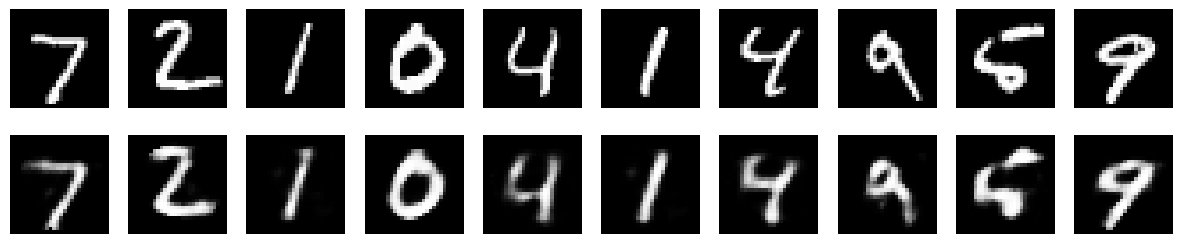

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Hyperparameters
input_size = 28 * 28  # MNIST images are 28x28
hidden_size = 64
latent_size = 32
batch_size = 128
learning_rate = 1e-3
num_epochs = 10

# Data loading
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, latent_size),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten input
        z = self.encoder(x)
        x_reconstructed = self.decoder(z)
        return x_reconstructed

# Initialize model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()  # Reconstruction loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for data, _ in train_loader:
        # Forward pass
        output = model(data)
        loss = criterion(output, data.view(-1, input_size))
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Visualize some reconstructed images
import matplotlib.pyplot as plt

# Get a batch of test data
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=10, shuffle=False)
test_images, _ = next(iter(test_loader))

# Reconstruct images
with torch.no_grad():
    reconstructed = model(test_images).view(-1, 1, 28, 28)

# Plot original and reconstructed images
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    # Original images
    axes[0, i].imshow(test_images[i].squeeze(), cmap='gray')
    axes[0, i].axis('off')
    # Reconstructed images
    axes[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
    axes[1, i].axis('off')
plt.show()
